In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [3]:
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 64

In [4]:
train_data_dir = '/Users/varun/Documents/Deep_Learning/data/train'
validation_data_dir = '/Users/varun/Documents/Deep_Learning/data/test'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)



In [6]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [8]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [9]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



In [10]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [11]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [12]:
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [13]:
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

In [17]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

In [18]:
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/25
448/448 [==============================] - 955s 2s/step - loss: 1.4669 - accuracy: 0.4346 - val_loss: 1.3395 - val_accuracy: 0.4926
Epoch 2/25
448/448 [==============================] - 883s 2s/step - loss: 1.3036 - accuracy: 0.5072 - val_loss: 1.0971 - val_accuracy: 0.5371
Epoch 3/25
448/448 [==============================] - 566s 1s/step - loss: 1.2160 - accuracy: 0.5447 - val_loss: 1.3655 - val_accuracy: 0.5526
Epoch 4/25
448/448 [==============================] - 553s 1s/step - loss: 1.1525 - accuracy: 0.5749 - val_loss: 1.0365 - val_accuracy: 0.5783
Epoch 5/25
448/448 [==============================] - 581s 1s/step - loss: 1.0892 - accuracy: 0.6013 - val_loss: 0.9968 - val_accuracy: 0.5932
Epoch 6/25
448/448 [==============================] - 553s 1s/step - loss: 1.0240 - accuracy: 0.6278 - val_loss: 0.8856 - val_accuracy: 0.6067
Epoch 7/25
448/448 [==============================] - 558s 1s/step - loss: 0.9675 - accuracy: 0.6496 - val_loss: 1.2115 - val_accuracy: 0.6023

In [19]:
model.save('emorecgwoaug.h5')

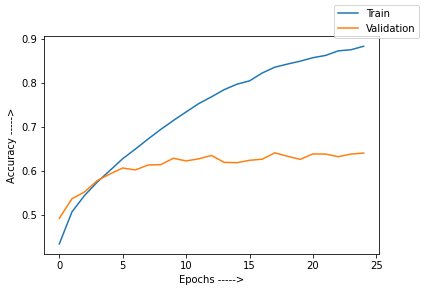

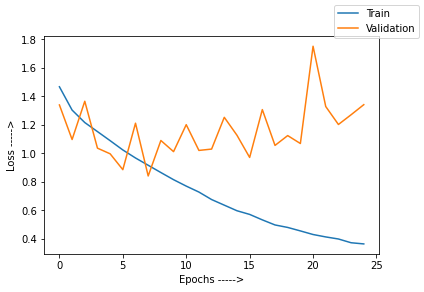

In [21]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


ax1 = plt.figure(0)
plt.plot(acc,label = 'Train')
plt.plot(val_acc, label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Accuracy ----->')
leg = ax1.legend()


ax2 = plt.figure(1)
plt.plot(loss,label = 'Train')
plt.plot(val_loss,label = 'Validation')
plt.xlabel('Epochs ----->')
plt.ylabel('Loss ----->')
leg = ax2.legend()

In [32]:
import cv2

import numpy as np

import tensorflow as tf

In [23]:
classes = ['angry','disguisted','fearful','happy','neutral','sad','suprised']

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: angry


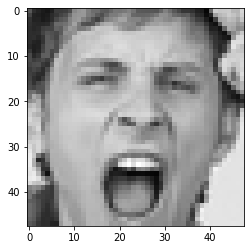

In [69]:
I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/angry/im3.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: angry


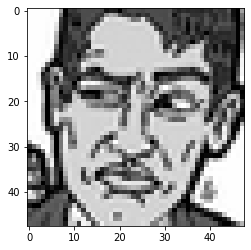

In [70]:
I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/angry/im0.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: angry


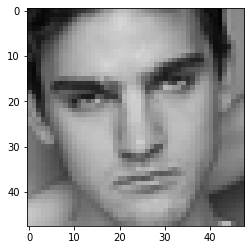

In [71]:
I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/angry/im10.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: angry


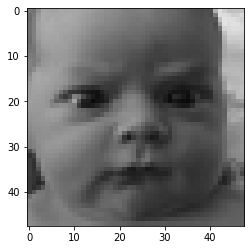

In [72]:
I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/angry/im123.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: disguisted


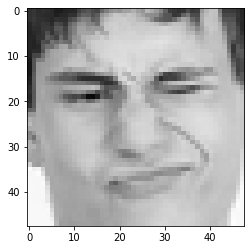

In [78]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/disgusted/im5.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: happy


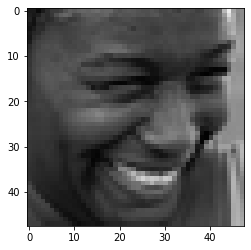

In [79]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/happy/im5.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: happy


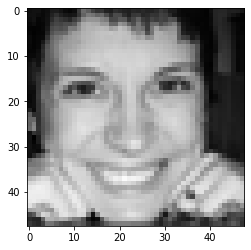

In [80]:


I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/happy/im516.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: happy


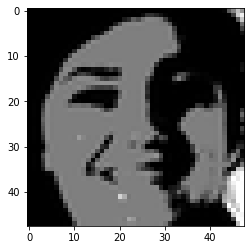

In [81]:


I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/happy/im312.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: happy


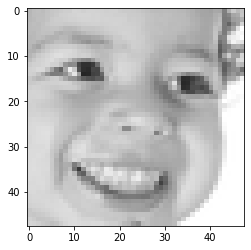

In [82]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/happy/im500.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: sad


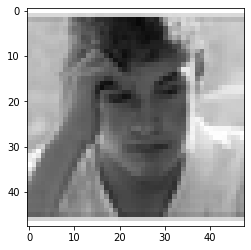

In [83]:
#Failed


I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/fearful/im1.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: fearful


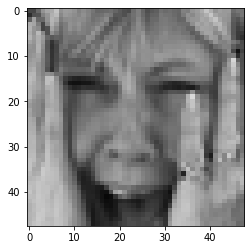

In [84]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/fearful/im0.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: fearful


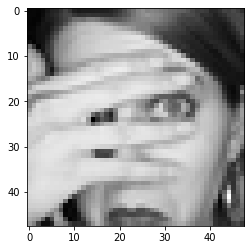

In [85]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/fearful/im10.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: fearful


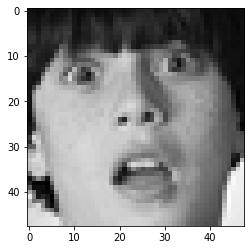

In [86]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/fearful/im24.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: angry


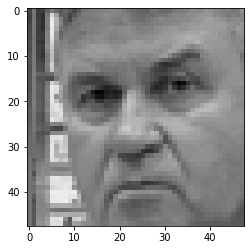

In [88]:
#Failed


I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im0.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: fearful


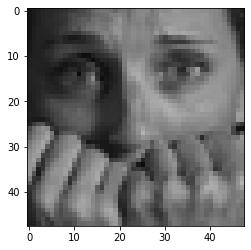

In [90]:
#Failed


I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im10.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: sad


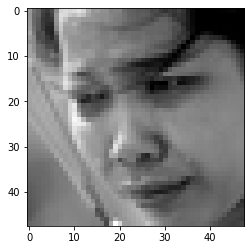

In [92]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im100.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: sad


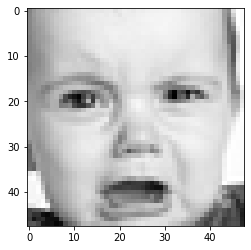

In [93]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im20.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: neutral


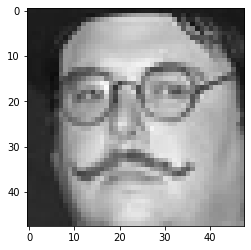

In [94]:
#Failed

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im110.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: sad


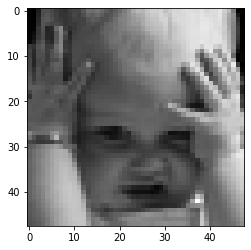

In [95]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/sad/im40.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: suprised


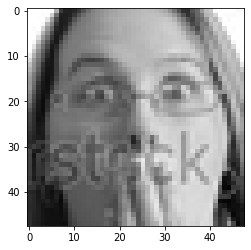

In [96]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/surprised/im0.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: suprised


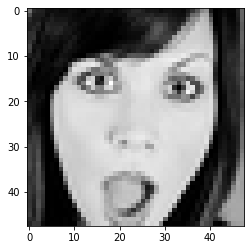

In [97]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/surprised/im10.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: suprised


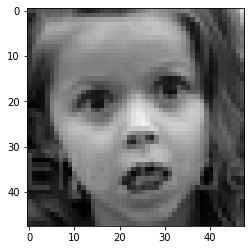

In [98]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/surprised/im100.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: suprised


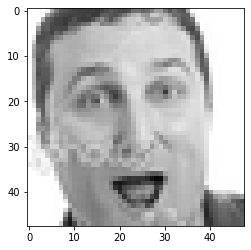

In [99]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/surprised/im20.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: fearful


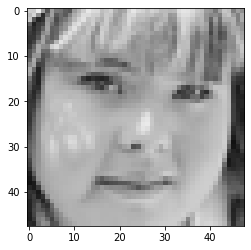

In [101]:
#Failed

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/neutral/im0.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: neutral


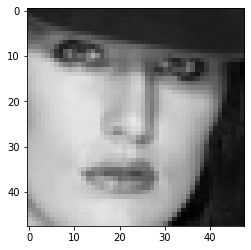

In [103]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/neutral/im100.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))

IG shape: (48, 48)
IGP Shape:(1, 48, 48, 1)
Predicted Emotion is: neutral


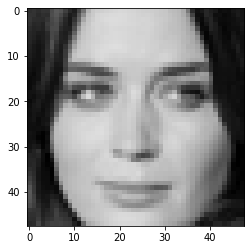

In [104]:

I1 = cv2.imread('/Users/varun/Documents/Deep_Learning/data/test/neutral/im20.png')

ID = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)

I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)


IG = tf.cast(I1, tf.float32)

plt.imshow(ID)

print("IG shape: " + str(IG.shape))

IG = IG/255

IGP = np.expand_dims(IG,axis = 0)

IGP = np.expand_dims(IGP,axis = 3)

print("IGP Shape:" + str(IGP.shape))

predictions = model.predict(IGP)

index = np.argmax(predictions)

print("Predicted Emotion is: " + str(classes[index]))